In [1]:
import os
import json
!pip install spotipy
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
#The Goal: 
# A supervised learning algorithm, such as a decision tree or support vector machine, 
# could be used to classify the genre of music based on the data provided. 
# The algorithm would be trained on a dataset of labeled music genres and the associated data values, 
# and then it could be used to predict the genre of music given a new set of data values.

cid ='d8762235995b4ddcbc0df90739df9a63' # Client ID; copy this from your app created on beta.developer.spotify.com
secret = '887a4eccdbde4195bfc0f7f4c472fe70' # Client Secret; copy this from your app
username = '12155311349' # Your Spotify username

#for avaliable scopes see https://developer.spotify.com/web-api/using-scopes/
scope = 'user-library-read playlist-modify-public playlist-read-private'

redirect_uri='https://localhost:8080/callback/'

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 

sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

token = util.prompt_for_user_token(username,scope,client_id=cid,client_secret=secret,redirect_uri="https://localhost:8080/callback/")

if token:
    sp = spotipy.Spotify(auth=token)
else:
    print("Can't get token for", username)


In [3]:
#Creating function and having user give PlaylistID, and genre (0 = counrty, 1 = rock...)
def input_playlist(playlistID, genre): 

    playlist = sp.user_playlist(username, playlistID);

    tracks = playlist["tracks"];
    songs = tracks["items"];

    #Putting Track ID, Track Name, Album, and artist name in matrix's
    #Rock Features
    track_ids = [] 
    track_names = []
    album = []
    artist =[]

    #Getting Rock Data
    for i in range(0, len(songs)):
        if songs[i]['track']['id'] != None: # Removes the local tracks in your playlist if there is any
            track_ids.append(songs[i]['track']['id'])
            track_names.append(songs[i]['track']['name'])
            album.append(songs[i]['track']['album']['name'])
            artist.append(songs[i]['track']['artists'][0]['name'])

    features = []
    for i in range(0,len(songs)):
        audio_features = sp.audio_features(track_ids[i])
        for track in audio_features:

          if track is None:
            print(track)
            features.append({'danceability': 0, 'energy': 0, 'key': 0, 'loudness': 0, 'mode': 0, 'speechiness': 0, 'acousticness': 0, 'instrumentalness': 0, 'liveness': 0, 'valence': 0, 'tempo': 0, 'type': 'audio_features', 'id': '00000', 'uri': 'spotify:track:0', 'track_href': 'https://api.spotify.com/', 'analysis_url': 'https://api.spotify.com/', 'duration_ms': 0, 'time_signature': 0})
          else:
            features.append(track)
    #Popular Music counrty, rock,pop, R&B, hip-hop, and classical

    #Creating our DataFrames
    df = pd.DataFrame(features, index = track_names) #Country


    #Adding a new column
    df['genre'] = genre #Country
    df['Song Title'] = track_names
    df['Artist'] = artist

    # Scale between 0 and 1
    df["key"] = (df["key"] / df["key"].max())
    df["tempo"] = (df["tempo"] / df["tempo"].max())
    df["loudness"] = (df["loudness"] / df["loudness"].min())
    
    return df

In [4]:
#Bringing in our Test Playlists
rockPlaylistID ='https://open.spotify.com/playlist/37i9dQZF1DWXRqgorJj26U?si=b4fc7abf24d943b7' 
countryPlaylistID = 'https://open.spotify.com/playlist/37i9dQZF1DWZBCPUIUs2iR?si=8aa077376b294156' 
rapPlaylistID = 'https://open.spotify.com/playlist/4riovLwMCrY3q0Cd4e0Sqp?si=d21e717925fe49cb'
rnbPlaylistID ='https://open.spotify.com/playlist/37i9dQZF1DX04mASjTsvf0?si=b73971c2510f4200'
popPlaylistID = 'https://open.spotify.com/playlist/7iUGicmg9AkkFhkLiYqYpA?si=042aa88085c24876'
classicalPlaylistID = 'https://open.spotify.com/playlist/27Zm1P410dPfedsdoO9fqm?si=104c7b4c8cd747f0'

# country = input_playlist(countryPlaylistID, 0)
# rock = input_playlist(rockPlaylistID, 1)
# rap = input_playlist(rapPlaylistID, 2)
# rnb = input_playlist(rnbPlaylistID,3)
# pop = input_playlist(popPlaylistID,4)
# classical = input_playlist(classicalPlaylistID,5)


country = input_playlist(countryPlaylistID, 'country')
rock = input_playlist(rockPlaylistID, 'rock')
rap = input_playlist(rapPlaylistID, 'rap')
rnb = input_playlist(rnbPlaylistID,'rnb')
pop = input_playlist(popPlaylistID,'pop')
classical = input_playlist(classicalPlaylistID,'classical')


In [5]:
#Putting all the data together
full_data = pd.concat([rock,country,rnb,pop,classical,rap[:1861]], ignore_index = True)

full_data_random = full_data.sample(frac=1)
# full_data_random

# #Just getting the numerical values, so no ID's, Artists, ect...
num_data_random = full_data_random[['danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','genre',]]
num_data_random

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
513,0.914,0.370,0.000000,0.808456,1,0.1910,0.05160,0.000000,0.0988,0.259,0.683632,rap
292,0.422,0.520,1.000000,0.597710,1,0.3430,0.00204,0.004130,0.4110,0.184,0.924997,rnb
221,0.524,0.816,0.090909,0.343051,1,0.3700,0.38300,0.000000,0.3490,0.789,0.975732,rnb
512,0.880,0.428,0.818182,0.642358,1,0.2060,0.14900,0.000051,0.1140,0.333,0.495047,rap
506,0.791,0.582,1.000000,0.568115,0,0.2860,0.01140,0.000000,0.3500,0.443,0.806826,rap
...,...,...,...,...,...,...,...,...,...,...,...,...
440,0.242,0.229,0.454545,0.358738,1,0.0354,0.91200,0.681000,0.1430,0.153,0.528867,classical
189,0.681,0.638,0.363636,0.381217,1,0.0367,0.69900,0.000629,0.0581,0.677,0.474875,country
525,0.754,0.342,0.909091,0.673157,0,0.0991,0.07300,0.000000,0.1930,0.423,0.638472,rap
173,0.471,0.445,0.181818,0.588161,1,0.0456,0.63100,0.000000,0.1630,0.452,0.555373,country


In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score

In [7]:
# Split the data into features (X) and target (y)
X = num_data_random.drop('genre', axis=1)
y = num_data_random['genre']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
#Fitting and Evaluating the Model 
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [9]:
y_pred = knn.predict(X_test)

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6333333333333333


In [11]:
k_values = [i for i in range (1,100)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

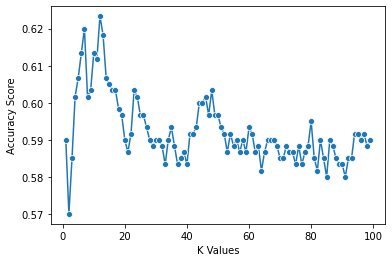

In [12]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [116]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=12)

In [117]:
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("Recall:", recall)

Accuracy: 0.5916666666666667


In [15]:
y_pred

array(['rnb', 'rock', 'country', 'classical', 'classical', 'classical',
       'country', 'rnb', 'rnb', 'rap', 'pop', 'rap', 'pop', 'rock', 'rnb',
       'country', 'pop', 'rock', 'classical', 'rap', 'country', 'rnb',
       'pop', 'pop', 'rap', 'rnb', 'rnb', 'rnb', 'rap', 'classical',
       'rock', 'rock', 'pop', 'rap', 'rap', 'pop', 'country', 'rap',
       'country', 'country', 'classical', 'classical', 'rap', 'classical',
       'country', 'country', 'rock', 'country', 'classical', 'rap',
       'rock', 'rap', 'rap', 'rnb', 'classical', 'country', 'country',
       'rock', 'country', 'rock', 'pop', 'pop', 'pop', 'rock',
       'classical', 'rnb', 'rap', 'country', 'pop', 'rock', 'country',
       'rnb', 'rnb', 'country', 'classical', 'rnb', 'pop', 'pop',
       'classical', 'country', 'country', 'country', 'pop', 'pop',
       'classical', 'classical', 'pop', 'rock', 'rap', 'rap', 'rap',
       'rap', 'country', 'rap', 'classical', 'rock', 'country', 'rap',
       'pop', 'pop', 'c

In [16]:
#Printing out our y_test
predicted = []
for i in range(0, len(y_test)):
    f=full_data.loc[y_test.index.values[i],:] 
    predicted.append(f)

predicted = pd.DataFrame(predicted) 
predicted[['Artist','Song Title','genre',]]

,Artist,Song Title,genre
254,Mary Mary,Shackles (Praise You),rnb
33,The Hollies,Long Cool Woman (In a Black Dress) - 1999 Rema...,rock
54,KISS,Rock And Roll All Nite,rock
483,Edward Elgar,Pomp And Circumstance March No 1,classical
456,Erik Satie,Les Trois Valses distinguées du précieux dégoû...,classical
...,...,...,...
357,Major Lazer,Light It Up (feat. Nyla & Fuse ODG) [Remix],pop
464,Ludwig van Beethoven,Beethoven: 'Ode To Joy' From Symphony No. 9 In...,classical
410,Wolfgang Amadeus Mozart,Deh Vieni Alla Finestra,classical
503,Lil Uzi Vert,XO Tour Llif3,rap


In [17]:
# BOXPLOTS of other data
def boxPlot(playlist, genre):
    playlist_num = playlist.drop(columns = ['mode','type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'genre', 'Song Title', 'Artist'])
    fig, ax = plt.subplots(figsize=(14,7))
    sns.boxplot(data = playlist_num)
    plt.xlabel(genre, fontweight="bold")
    plt.ylabel('Value', fontweight="bold")
    return plt


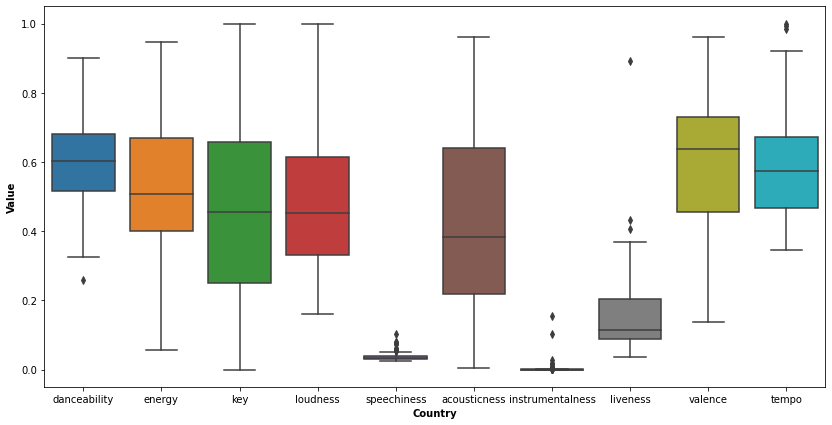

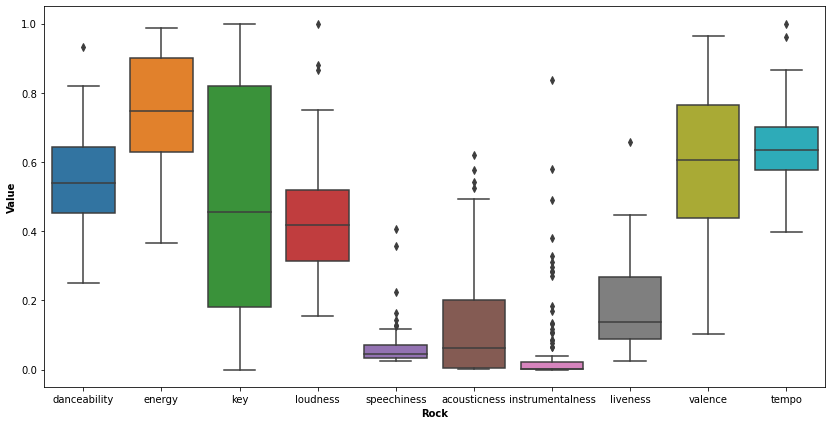

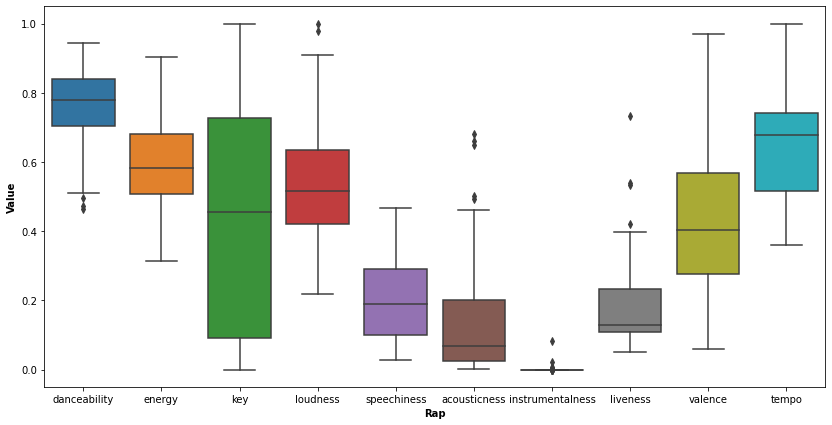

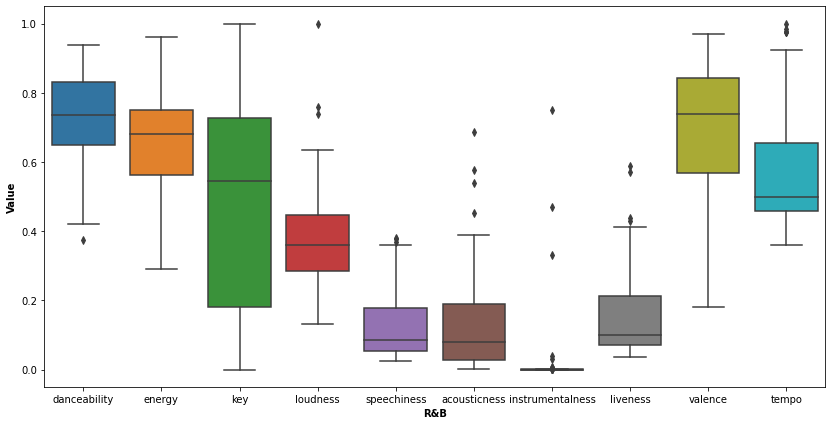

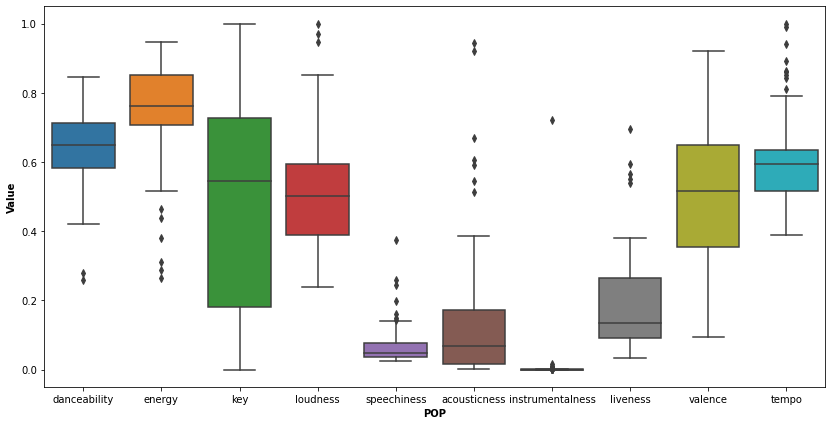

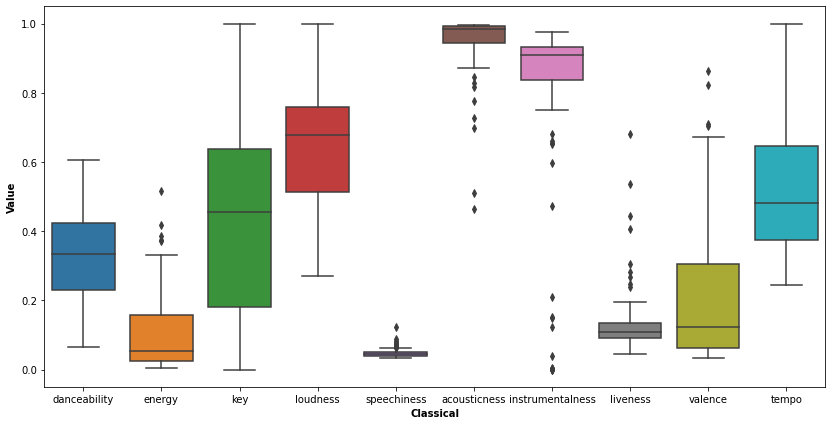

In [20]:
country_boxplot = boxPlot(country,'Country')
rock_boxplot = boxPlot(rock,'Rock')
rap_boxplot = boxPlot(rap,'Rap')
rnb_boxplot = boxPlot(rnb,'R&B')
pop_boxplot = boxPlot(pop,'POP')
classical_boxplot = boxPlot(classical,'Classical')

In [29]:
# Plot linear correlation matrix
def linear_correlation(playlist,genre):
    playlist_num = playlist.drop(columns = ['mode','type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'genre', 'Song Title', 'Artist'])
    fig, ax = plt.subplots(figsize=(14,7))
    sns.heatmap(playlist_num.corr(), annot=True, cmap='YlGnBu', vmin=-1, vmax=1, center=0, ax=ax)
    plt.title(genre +' Linear Correlation Matrix')
    plt.show()

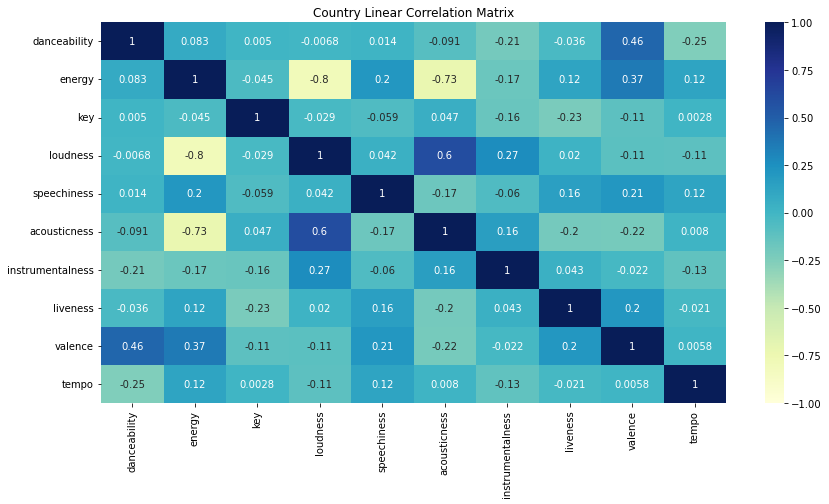

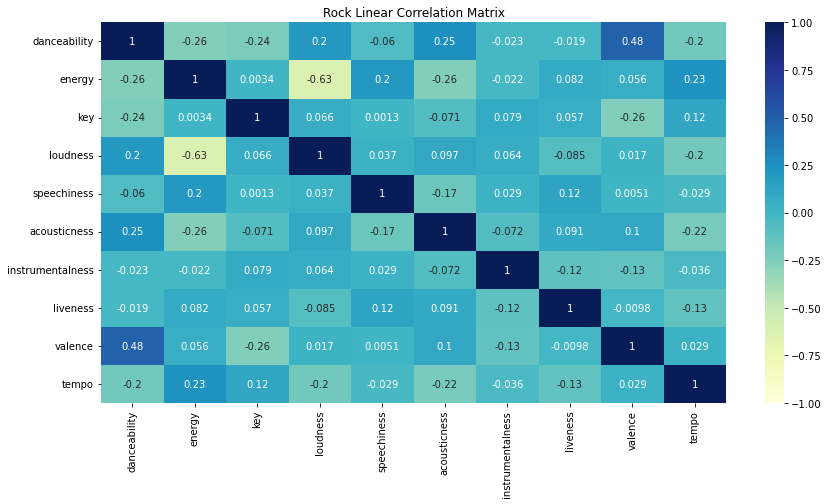

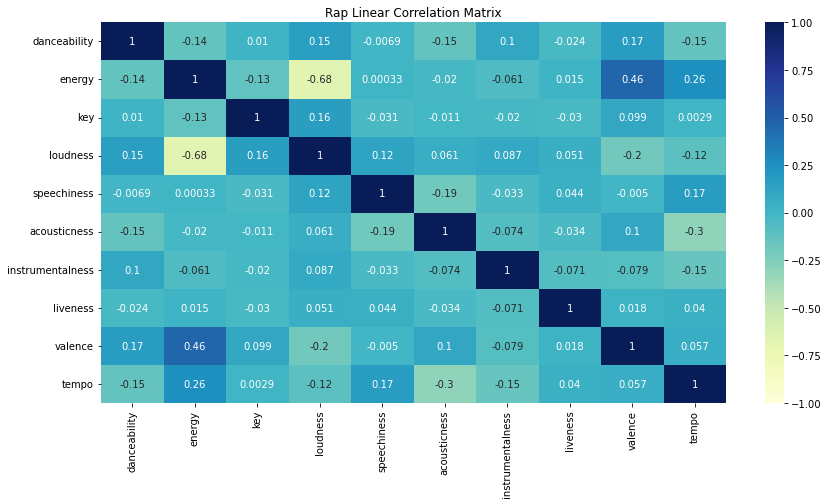

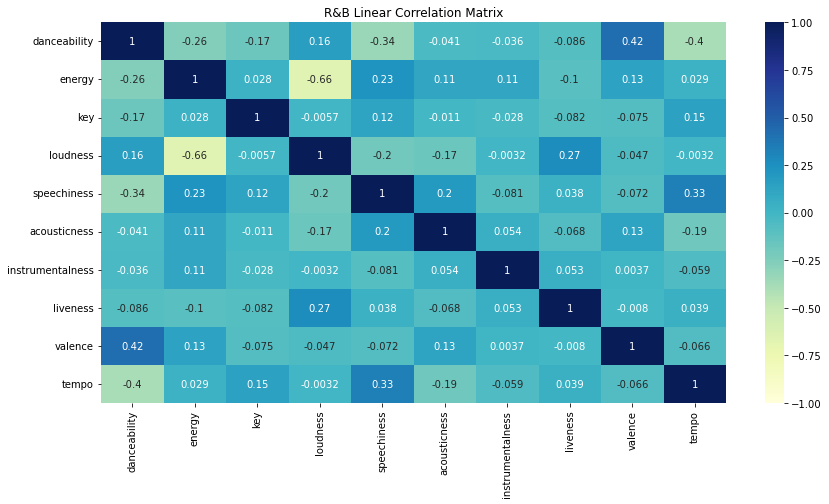

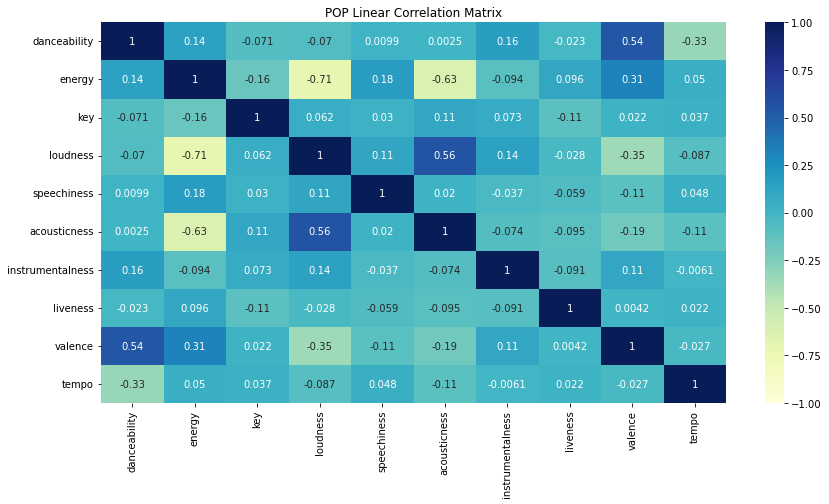

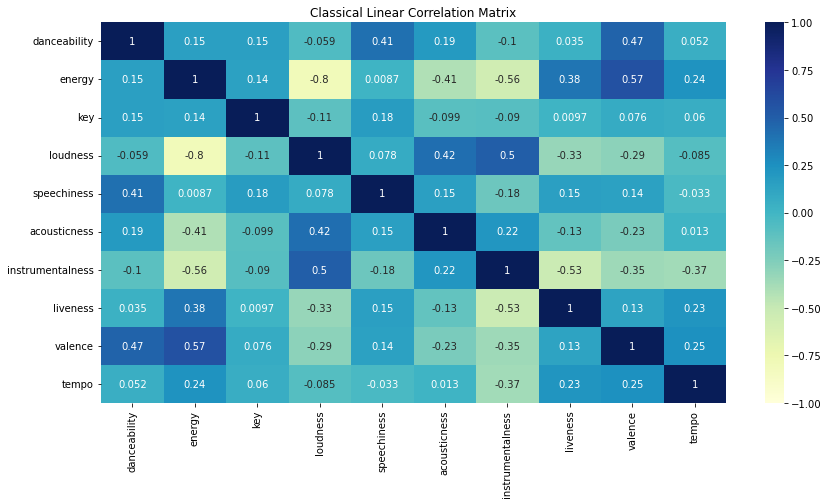

In [31]:
linear_correlation(country,'Country')
linear_correlation(rock,'Rock')
linear_correlation(rap,'Rap')
linear_correlation(rnb,'R&B')
linear_correlation(pop,'POP')
linear_correlation(classical,'Classical')

In [115]:
import plotly.graph_objects as go
import plotly.offline as pyo

def radar_plot(playlist,genre,color):
    playlist_num = playlist.drop(columns = ['mode','type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
           'time_signature', 'genre', 'Song Title', 'Artist'])

    categories = playlist_num.columns
    categories = [*categories, categories[0]]

    mean_r = playlist_num.mean()

    mean_r = [*mean_r, mean_r[0]]


    fig = go.Figure(
        data=[
            go.Scatterpolar(r=mean_r, theta=categories, name= genre,fill='toself',fillcolor = color, ),],
        layout=go.Layout(
            title=go.layout.Title(text= genre+' Mean Values Radar Plot'),
            polar={'radialaxis': {'visible': True}},
            showlegend=True,
        )
    )

    pyo.iplot(fig)

In [114]:
radar_plot(country,'Country','orange')
radar_plot(rock,'Rock','red')
radar_plot(rap,'Rap','lightblue')
radar_plot(rnb,'R&B','purple')
radar_plot(pop,'POP','pink')
radar_plot(classical,'Classical','green')